In [963]:
import matplotlib.pyplot as plt
import os
import random

In [964]:
data_path = r"D:\Jellybean\data"

In [965]:
images = os.listdir(data_path)

In [966]:
sample_path = data_path + "\\" +random.sample(images,1)[0]

In [967]:
sample_path

'D:\\Jellybean\\data\\Crushed Pineapple.png'

In [968]:
sample_image = plt.imread(sample_path)

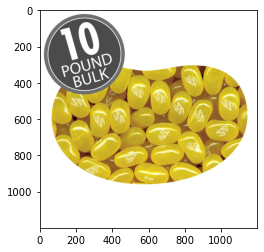

In [969]:
plt.imshow(sample_image)

In [970]:
mask_path = r"D:\Jellybean\inst\JellyBellyMask.png"

In [971]:
mask_image = plt.imread(mask_path)[:,:,:3]

In [972]:
mask_image.shape

(1200, 1200, 3)

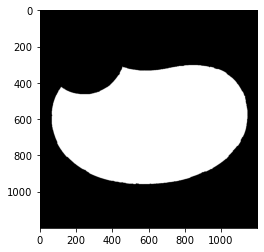

In [973]:
plt.imshow(mask_image)
plt.show()

In [974]:
mask_sample = sample_image*mask_image

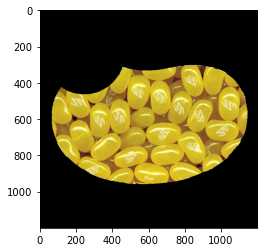

In [975]:
plt.imshow(mask_sample)

In [976]:
from skimage.color import rgb2gray

In [977]:
gray_mask = rgb2gray(mask_image)

In [978]:
gray_mask = cv2.convertScaleAbs(gray_mask*255)

In [979]:
import cv2

In [980]:
## get the minimum bounding rectangle
contours,hierarchy = cv2.findContours(gray_mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [981]:
cnt = contours[0]

In [982]:
x,y,w,h = cv2.boundingRect(cnt)

In [983]:
mask_sample_bounded = mask_sample[y:y+h,x:x+w]

In [984]:
mask_sample_bounded.shape

(656, 1078, 3)

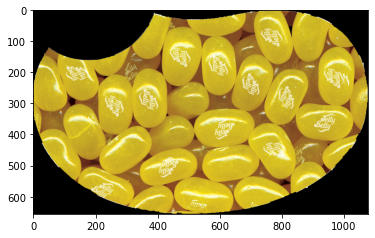

In [985]:
plt.imshow(mask_sample_bounded)

In [986]:
img_og = cv2.convertScaleAbs(mask_sample_bounded*255.0)

In [987]:
mask_sample_bounded_gray = rgb2gray(mask_sample_bounded)

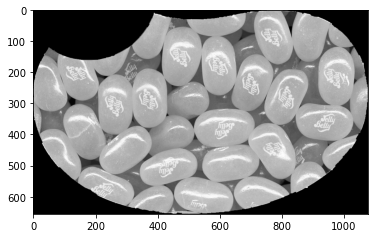

In [988]:
# see the grayscale image
plt.imshow(mask_sample_bounded_gray, "gray")
plt.show()

In [989]:
image_max = ndimage.maximum_filter(mask_sample_bounded_gray, size=60, mode='constant')

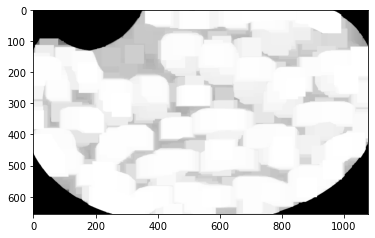

In [990]:
plt.imshow(image_max, "gray")

In [991]:
import skimage

In [992]:
coordinates = skimage.feature.peak_local_max(mask_sample_bounded_gray, min_distance=60)

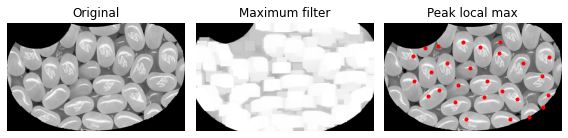

In [993]:
# display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(mask_sample_bounded_gray, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(mask_sample_bounded_gray, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()

In [994]:
fg_mask = np.zeros((image_max.shape[0], image_max.shape[1]))

In [995]:
coordinates.shape

(27, 2)

In [996]:
coordinates

array([[571, 881],
       [210, 998],
       [353, 184],
       [247, 845],
       [450, 609],
       [202, 175],
       [352, 623],
       [273, 519],
       [465, 806],
       [296, 282],
       [512, 963],
       [438, 995],
       [586, 499],
       [408, 333],
       [444, 267],
       [483, 430],
       [146, 583],
       [380, 447],
       [185, 696],
       [585, 764],
       [325, 958],
       [114, 480],
       [246, 383],
       [412, 717],
       [118, 702],
       [141, 326],
       [150, 251]], dtype=int64)

In [997]:
for coord in coordinates: 
    fg_mask[coord[0], coord[1]] = 1

In [998]:
fg_mask = cv2.convertScaleAbs(fg_mask*255.0)

In [999]:
fg_mask.shape

(656, 1078)

In [1000]:
fg_mask = np.dstack([fg_mask]*3)

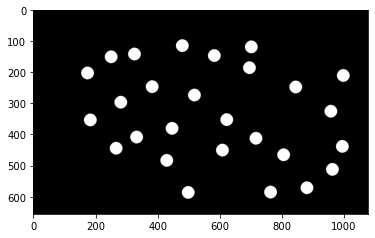

In [1001]:
img = np.zeros((fg_mask.shape[0],fg_mask.shape[1],3), np.uint8)
for coord in coordinates:
    cv2.ellipse(img,(coord[1],coord[0]),(20,20),0,0,360,(255,255,255),-1)
plt.imshow(img)

In [1002]:
overlay = cv2.addWeighted(img_og,0.3,img,0.7,0)

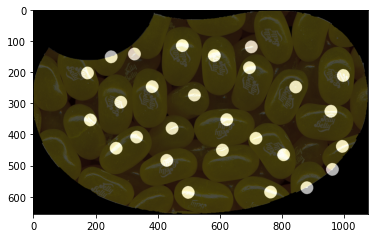

In [1003]:
plt.imshow(overlay)

In [1004]:
sure_fg = img[:,:,0].copy()

In [1005]:
import numpy as np

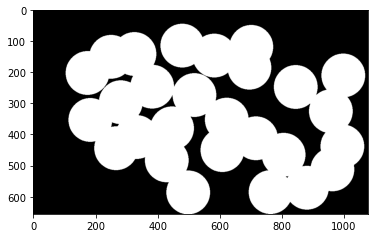

In [1006]:
img = np.zeros((fg_mask.shape[0],fg_mask.shape[1],3), np.uint8)
for coord in coordinates:
    cv2.ellipse(img,(coord[1],coord[0]),(70,70),0,0,360,(255,255,255),-1)
plt.imshow(img)

In [1007]:
# sure_fg = np.uint8(sure_sure_fg)

In [1008]:
sure_bg = img[:,:,0]

In [1009]:
unknown = cv2.subtract(sure_bg,sure_fg)

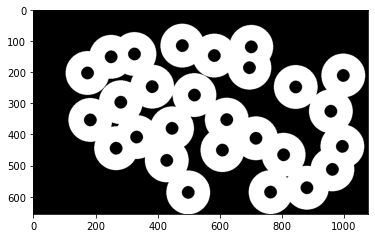

In [1010]:
plt.imshow(unknown, "gray")

In [1011]:
ret, markers = cv2.connectedComponents(sure_fg)

In [1012]:
markers = markers+1

In [1013]:
markers.shape

(656, 1078)

In [1014]:
markers[unknown==255] = 0

In [1015]:
img = cv2.convertScaleAbs(mask_sample_bounded*255.0)

In [1016]:
img.shape

(656, 1078, 3)

In [1017]:
markers = cv2.watershed(img,markers)

In [1018]:
img[markers == -1] = [255,255,255]

In [1019]:
np.unique(markers)

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int32)

In [1020]:
from skimage import measure, color, io

In [1021]:
img2 = color.label2rgb(markers, bg_label=0)

In [1022]:
np.unique(markers)

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int32)

In [1023]:
# see the image
temp1 = np.zeros((markers.shape[0], markers.shape[1]))
for idx in np.unique(markers):
    if idx not in [1,-1]:
        temp = markers == idx
        temp = cv2.convertScaleAbs(temp*255.0)
        ## get the minimum bounding rectangle
        contours,hierarchy = cv2.findContours(temp,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(temp1, contours, -1, (255,255,255), -1)
#         cnt = contours[0]

#         x,y,w,h = cv2.boundingRect(cnt)

#         mask_sample_bounded = img_og[y:y+h,x:x+w, :]
#         plt.imshow(mask_sample_bounded)
#         plt.show()

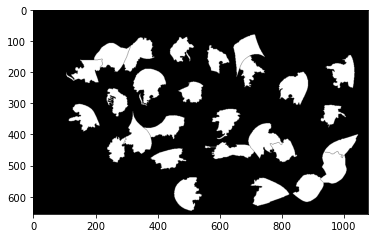

In [1024]:
plt.imshow(temp1, "gray")

In [1025]:
temp1 = np.dstack([temp1]*3)

In [1026]:
temp1 = cv2.convertScaleAbs(temp1*255.0)

In [1027]:
overlay = cv2.addWeighted(img_og,0.3,temp1,0.7,0)

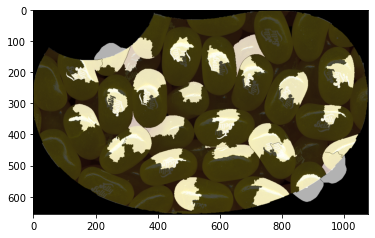

In [1028]:
plt.imshow(overlay)

In [1044]:
rgb_vector.mean(0)

array([191.74947953, 162.58411817,  41.61177754])

In [1058]:
flavor = sample_path.split("\\")[-1].split(".")[0]

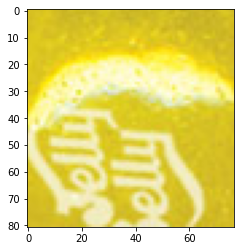

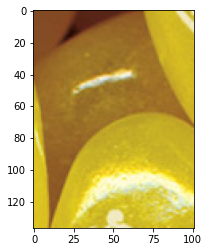

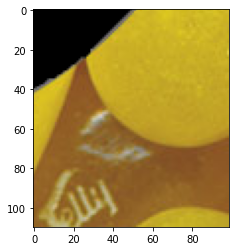

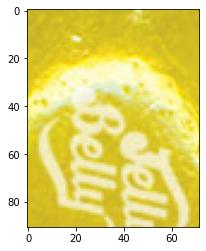

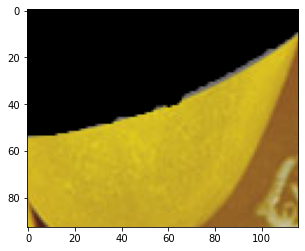

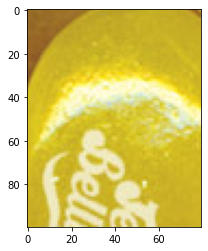

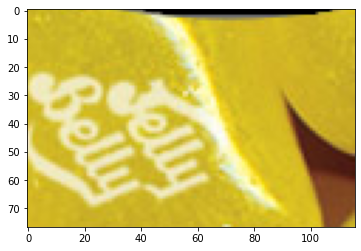

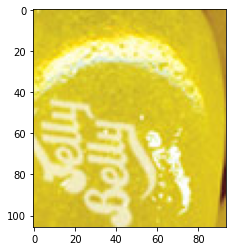

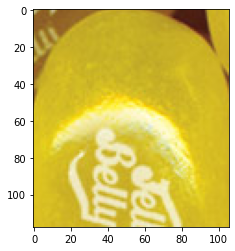

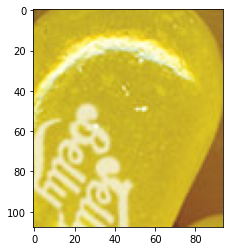

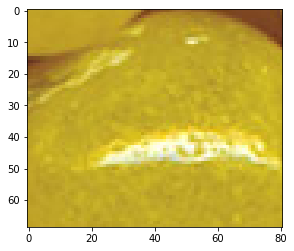

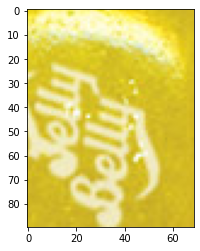

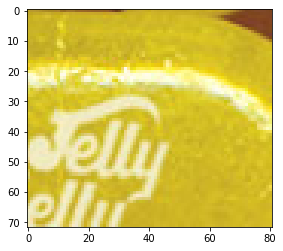

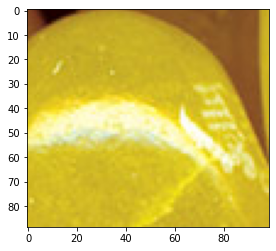

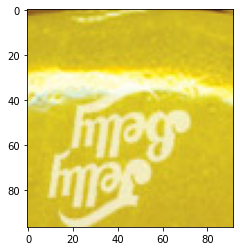

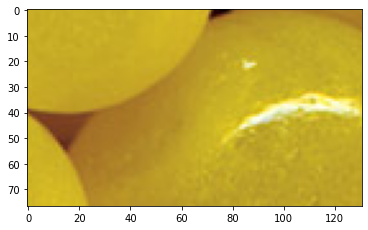

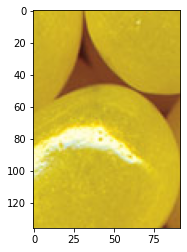

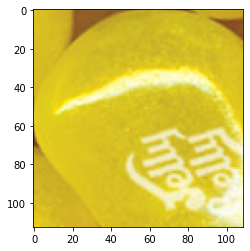

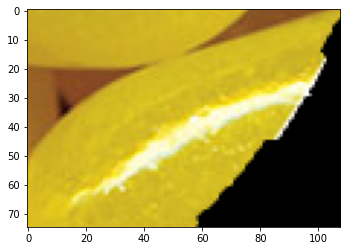

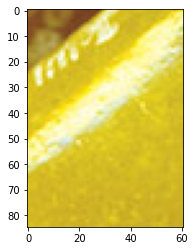

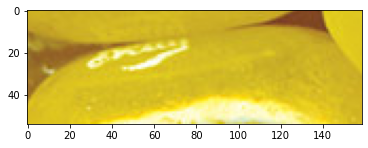

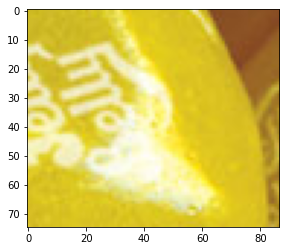

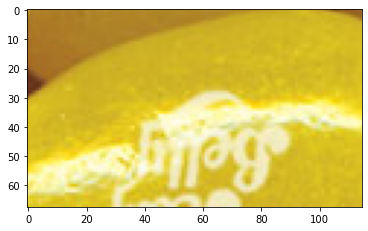

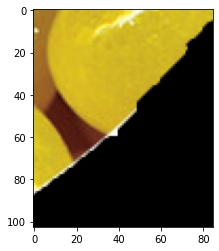

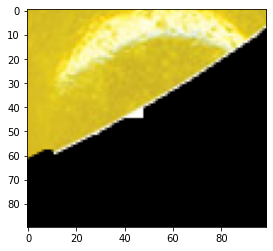

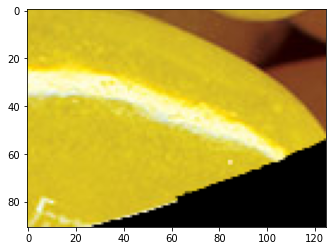

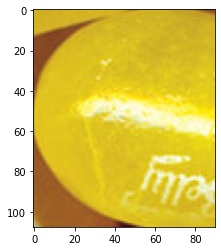

In [1050]:
# see the image
catch = []
for idx in np.unique(markers):
    temp = np.zeros((markers.shape[0], markers.shape[1]))
    if idx not in [1,-1]:
        temp = markers == idx
        temp = cv2.convertScaleAbs(temp*255.0)
        ## get the minimum bounding rectangle
        contours,hierarchy = cv2.findContours(temp,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        cnt = contours[0]

        x,y,w,h = cv2.boundingRect(cnt)

        mask_sample_bounded = img_og[y:y+h,x:x+w, :]
        rgb_vector = mask_sample_bounded.reshape(mask_sample_bounded.shape[0]*mask_sample_bounded.shape[1],3)
        rgb_vector_sum = rgb_vector.sum(1)
        rgb_vector = rgb_vector[rgb_vector_sum != 0]
        rgb_mean = rgb_vector.mean(0)
        rgb_std = rgb_vector.std(0)
        rgb_mean_std = rgb_mean/rgb_std
        all_features = [rgb_mean, rgb_std, rgb_mean_std]
        all_features = [item for feat in all_features for item in feat]
        catch.append(all_features)
        plt.imshow(mask_sample_bounded)
        plt.show()

In [1116]:
def get_jellybeans(sample_path):
    flavor = sample_path.split("\\")[-1].split(".")[0]
    sample_image = plt.imread(sample_path)
    mask_image = plt.imread(mask_path)[:,:,:3]
    mask_sample = sample_image*mask_image
    gray_mask = rgb2gray(mask_image)
    gray_mask = cv2.convertScaleAbs(gray_mask*255)
    ## get the minimum bounding rectangle
    contours,hierarchy = cv2.findContours(gray_mask,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    mask_sample_bounded = mask_sample[y:y+h,x:x+w]
    img_og = cv2.convertScaleAbs(mask_sample_bounded*255.0)
    mask_sample_bounded_gray = rgb2gray(mask_sample_bounded)
    image_max = ndimage.maximum_filter(mask_sample_bounded_gray, size=60, mode='constant')
    coordinates = skimage.feature.peak_local_max(mask_sample_bounded_gray, min_distance=60)
    fg_mask = np.zeros((image_max.shape[0], image_max.shape[1]))
    img = np.zeros((fg_mask.shape[0],fg_mask.shape[1],3), np.uint8)
    for coord in coordinates:
        cv2.ellipse(img,(coord[1],coord[0]),(20,20),0,0,360,(255,255,255),-1)
    sure_fg = img[:,:,0].copy()
    img = np.zeros((fg_mask.shape[0],fg_mask.shape[1],3), np.uint8)
    for coord in coordinates:
        cv2.ellipse(img,(coord[1],coord[0]),(70,70),0,0,360,(255,255,255),-1)
    plt.imshow(img)
    sure_bg = img[:,:,0]
    unknown = cv2.subtract(sure_bg,sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+1
    markers[unknown==255] = 0
    img = cv2.convertScaleAbs(mask_sample_bounded*255.0)
    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,255,255]
    catch = []
    # see the image
    for idx in np.unique(markers):
        temp = np.zeros((markers.shape[0], markers.shape[1]))
        if idx not in [1,-1]:
            temp = markers == idx
            temp = cv2.convertScaleAbs(temp*255.0)
            ## get the minimum bounding rectangle
            contours,hierarchy = cv2.findContours(temp,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

            cnt = contours[0]

            x,y,w,h = cv2.boundingRect(cnt)

            mask_sample_bounded = img_og[y:y+h,x:x+w, :]
            rgb_vector = mask_sample_bounded.reshape(mask_sample_bounded.shape[0]*mask_sample_bounded.shape[1],3)
            rgb_vector_sum = rgb_vector.sum(1)
            rgb_vector = rgb_vector[rgb_vector_sum != 0]
            rgb_mean = rgb_vector.mean(0)
            rgb_std = rgb_vector.std(0)
#             rgb_mean_std = rgb_mean/rgb_std
            all_features = [rgb_mean, rgb_std]
            all_features = [item for feat in all_features for item in feat]
            catch.append(all_features)
            catch_df = pd.DataFrame(catch)
            catch_df.columns = ["r_mean", "g_mean", "b_mean", "r_std", "g_std", "b_std"]
            catch_df["flavor"] = flavor
#             plt.imshow(mask_sample_bounded)
#             plt.show()
    return catch_df

In [1117]:
import pandas as pd

In [1118]:
images = os.listdir(data_path)

sample_path = data_path + "\\" +random.sample(images,1)[0]

In [1119]:
from tqdm.notebook import tqdm

  0%|          | 0/71 [00:00<?, ?it/s]

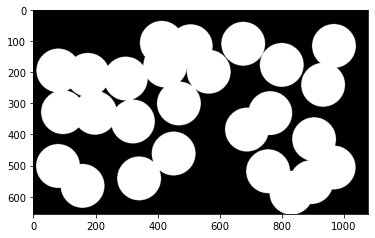

In [1120]:
catch = []
for item in tqdm(images):
    sample_path = data_path + "\\" + item
    catch_df = get_jellybeans(sample_path)
    catch.append(catch_df)

In [1121]:
catch_df = pd.concat(catch)

In [2]:
# catch_df.head()

In [1122]:
dict1 = pd.DataFrame(catch_df["flavor"].value_counts())

In [1123]:
dict1 = dict1.reset_index()

In [1124]:
dict1.columns = ["Flavor", "Frequency"]

In [1125]:
import seaborn as sns

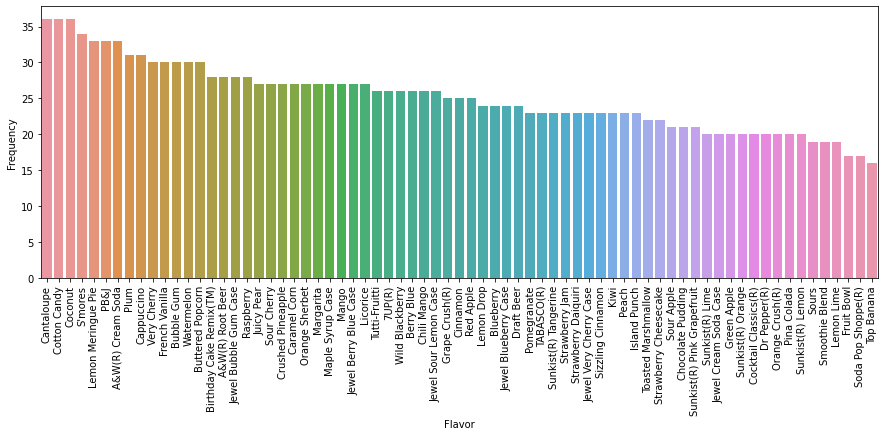

In [1126]:
plt.figure(figsize = (15,5))
sns.barplot(data=dict1, x="Flavor", y="Frequency")
plt.xticks(rotation = 90)
plt.show()

In [1127]:
catch_df.isnull().sum()

r_mean    0
g_mean    0
b_mean    0
r_std     0
g_std     0
b_std     0
flavor    0
dtype: int64

In [1128]:
# catch_df = catch_df.fillna(catch_df.mean())

C:\Users\vedpi\AppData\Local\Temp\ipykernel_44056\474544348.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  catch_df = catch_df.fillna(catch_df.mean())


In [1129]:
# catch_df.isnull().sum()

In [1131]:
from sklearn.model_selection import GridSearchCV

In [1132]:
from sklearn.ensemble import RandomForestClassifier

In [1133]:
rf = RandomForestClassifier(n_jobs=6)

In [1143]:
parameters = {'n_estimators':[100]}

In [1144]:
gs = GridSearchCV(estimator=rf, cv=5, n_jobs=6, scoring="accuracy", param_grid = parameters, verbose = 5)

In [1145]:
gs.fit(catch_df.iloc[:,:-1], catch_df.iloc[:,-1])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=6), n_jobs=6,
             param_grid={'n_estimators': [100]}, scoring='accuracy', verbose=5)

In [1146]:
gs.best_score_

0.7323803264322489